![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Deep Learning Fundamentals - Logistic Regression

# Task 1: Introduction

In [1]:
import random
import numpy as np
import warnings
import helpers.plt, helpers.dataset
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

print('Libraries imported')

Libraries imported


# Task 2: Hyperparameters

In [2]:
lr = 0.3
batch_size = 300
iterations = 40

# Task 3: Dataset

In [5]:
(X_train, Y_train), (X_test, Y_test) = helpers.dataset.get_data()

Loading data..
Done.


In [6]:
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (12665, 28, 28)
Shape of Y_train: (12665,)
Shape of X_test: (2115, 28, 28)
Shape of Y_test: (2115,)


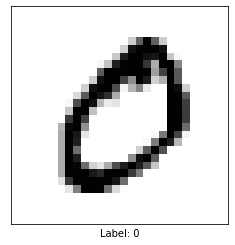

In [7]:
helpers.plt.show_example(X_train[0], Y_train[0])

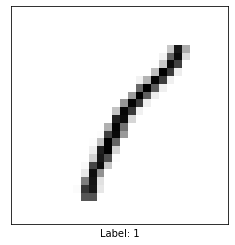

In [8]:
helpers.plt.show_example(X_train[-1], Y_train[-1])

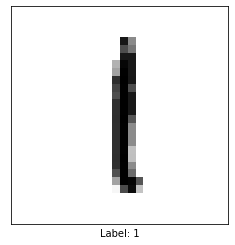

In [9]:
helpers.plt.show_example(X_train[6222], Y_train[6222])

# Task 4: A Mini Batch of Examples

X_batch shape (1, 784)


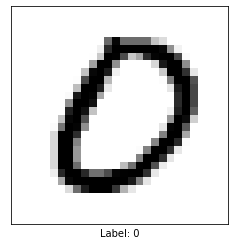

In [10]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_train, Y_train, 1)
print("X_batch shape", X_batch.shape)
helpers.plt.show_example(X_batch[0], Y_batch[0])

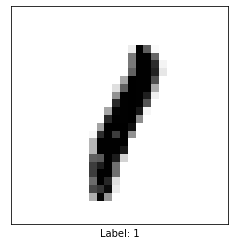

In [11]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_test, Y_test, 1)
helpers.plt.show_example(X_batch[0], Y_batch[0])

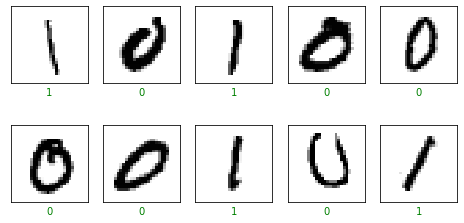

In [12]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_train, Y_train, 10)
helpers.plt.show_ten_examples(X_batch, Y_batch, Y_batch)

# Task 5: Create Model

A logistic model is simply a multi variable linear equation which gives a binary output. The pixel values of our input images are going to be the input features - the independent variables that form the logistic regression equation. And the class label - either 0 or 1 in our case, is the output y.

\begin{equation}
z = b + w_1x_1 + w_2x_2 + ... + w_N * x_N
\end{equation}

\begin{equation}
y = \sigma(z)
\end{equation}

To simplify, we can use vectorized represenation where X is the feature matrix and W is the weight matrix:

\begin{equation}
y = \sigma(W^T.X + b)
\end{equation}

In [16]:
class LogisticModel:
    def __init__(self, num_features):
        # Your code here
        self.W = np.reshape(np.random.randn((num_features)), (num_features, 1))
        self.b = np.zeros((1, 1))
        self.num_features = num_features
        self.losses = []
        self.accuracies = []
        
    def summary(self):
        print('=================================')
        print('Number of features:', self.num_features)
        print('Shape of weights:', self.W.shape)
        print('Shape of biases:', self.b.shape)
        print('=================================')
        
# Your code here
model = LogisticModel(num_features=784)
model.summary()

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)


# Task 5: Forward Pass

For a single training example, the loss should be:

\begin{equation}
L(y, \hat{y}) = -(y * log(\hat{y}) + (1 - y) * log(1 - \hat{y}))
\end{equation}

In [23]:
class LogisticModel(LogisticModel):
    def _forward_pass(self, X, Y=None):
        # Your code here
        batch_size = X.shape[0]
        Z = np.dot(X, self.W) + self.b
        A = 1./(1. + np.exp(-Z))
        loss = float(1e6)
        if Y is not None:
            loss = -1 * np.sum(np.dot(np.transpose(Y), np.log(A)) + \
                        np.matmul(np.transpose(1-Y), np.log(1-A)))
            loss /= batch_size
        return A, loss   

# Task 6: Backward Pass

In [37]:
class LogisticModel(LogisticModel):
    def _backward_pass(self, A, X, Y):
        # Your code here
        batch_size = X.shape[0]
        dZ = A - Y
        dW = np.dot(np.transpose(X), dZ) / batch_size
        db = np.sum(dZ) / batch_size
        return dW, db

# Task 7: Update Parameters

In [19]:
class LogisticModel(LogisticModel):
    def _update_params(self, dW, db, lr):
        # Your code here
        self.W -= lr * dW
        self.b -= lr * db

# Task 8: Check Model Performance

In [20]:
class LogisticModel(LogisticModel):
    def predict(self, X, Y=None):
        # Your code here
        A, loss = self._forward_pass(X, Y)
        Y_hat = A > 0.5
        return np.squeeze(Y_hat), loss
    
    def evaluate(self, X, Y):
        # Your code here
        Y_hat, loss = self.predict(X, Y)
        accuracy = np.sum(Y_hat == np.squeeze(Y)) / X.shape[0]
        return accuracy, loss

In [29]:
model = LogisticModel(784)
model.summary()

X, Y = helpers.dataset.get_random_batch(X_test, Y_test, batch_size)
acc, loss = model.evaluate(X, Y)
print('Untrained model accuracy: {}, loss: {}'.format(acc, loss))

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)
Untrained model accuracy: 0.8066666666666666, loss: 0.5006083996100089


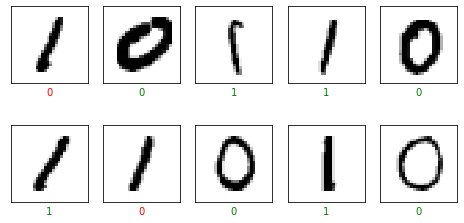

In [31]:
preds, _ = model.predict(X)
helpers.plt.show_ten_examples(X, Y, preds)

# Task 9: Training Loop

In [40]:
class LogisticModel(LogisticModel):
    def train(self, batch_size, get_batch, lr, iterations, X_train, Y_train, X_test, Y_test):
        # Your code here
        print("Training ....")
        self.accuracies = []
        self.losses = []
        
        for i in range(iterations):
            X, Y = get_batch(X_train, Y_train, batch_size)
            A, _ = self._forward_pass(X, Y)
            dW, db = self._backward_pass(A, X, Y)
            self._update_params(dW, db, lr)
            
            X, Y = get_batch(X_test, Y_test, batch_size)
            val_acc, val_loss = self.evaluate(X, Y)
            self.accuracies.append(val_acc)
            self.losses.append(val_loss)
            
            print('Iter: {}, Val Acc: {: .3f}, Val Loss: {:.3f}'.format(i, val_acc, val_loss))
            
        print('Training is finished')       

# Task 10: Training the Model

In [41]:
model = LogisticModel(784)

X, Y = helpers.dataset.get_random_batch(X_test, Y_test, batch_size)
print('Before training performance:', model.evaluate(X, Y))

model.train(
    batch_size, 
    helpers.dataset.get_random_batch, 
    lr, 
    iterations, 
    X_train, 
    Y_train, 
    X_test, 
    Y_test
    
)

print('After training performance:', model.evaluate(X, Y))


Before training performance: (0.7766666666666666, 1.0243008937354265)
Training ....
Iter: 0, Val Acc:  0.777, Val Loss: 0.897
Iter: 1, Val Acc:  0.863, Val Loss: 0.525
Iter: 2, Val Acc:  0.877, Val Loss: 0.538
Iter: 3, Val Acc:  0.880, Val Loss: 0.394
Iter: 4, Val Acc:  0.867, Val Loss: 0.416
Iter: 5, Val Acc:  0.923, Val Loss: 0.304
Iter: 6, Val Acc:  0.890, Val Loss: 0.359
Iter: 7, Val Acc:  0.953, Val Loss: 0.107
Iter: 8, Val Acc:  0.943, Val Loss: 0.213
Iter: 9, Val Acc:  0.953, Val Loss: 0.143
Iter: 10, Val Acc:  0.937, Val Loss: 0.140
Iter: 11, Val Acc:  0.950, Val Loss: 0.161
Iter: 12, Val Acc:  0.930, Val Loss: 0.169
Iter: 13, Val Acc:  0.957, Val Loss: 0.147
Iter: 14, Val Acc:  0.947, Val Loss: 0.164
Iter: 15, Val Acc:  0.983, Val Loss: 0.044
Iter: 16, Val Acc:  0.957, Val Loss: 0.139
Iter: 17, Val Acc:  0.957, Val Loss: 0.104
Iter: 18, Val Acc:  0.963, Val Loss: 0.074
Iter: 19, Val Acc:  0.977, Val Loss: 0.072
Iter: 20, Val Acc:  0.960, Val Loss: 0.118
Iter: 21, Val Acc:  0.9

# Task 11: Display the Results

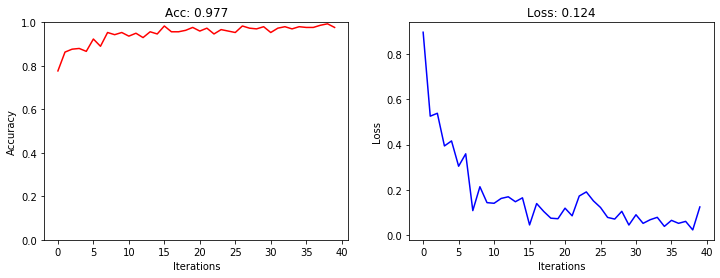

In [42]:
helpers.plt.plot_metrics(model)

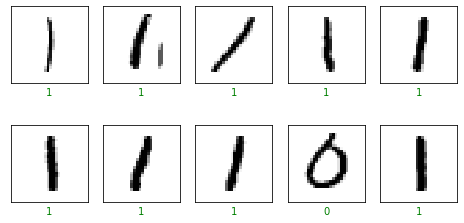

In [43]:
preds, _ = model.predict(X, Y)
helpers.plt.show_ten_examples(X, Y, preds)